In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix,classification_report


In [21]:
df=pd.read_csv("/Users/akanshamalviya/Desktop/breast-cancer-wisconsin-data.csv")

In [22]:
pd.pandas.set_option('display.max_columns',None)
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
323,M,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.15040,0.2569,0.06670,0.5702,1.0230,4.012,69.06,0.005485,0.02431,0.03190,0.01369,0.02768,0.003345,25.30,31.86,171.10,1938.0,0.1592,0.4492,0.5344,0.2685,0.5558,0.10240
321,M,20.16,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.07726,0.1928,0.05096,0.5925,0.6863,3.868,74.85,0.004536,0.01376,0.02645,0.01247,0.02193,0.001589,23.06,23.03,150.20,1657.0,0.1054,0.1537,0.2606,0.1425,0.3055,0.05933
242,B,11.30,18.19,73.93,389.4,0.09592,0.13250,0.15480,0.02854,0.2054,0.07669,0.2428,1.6420,2.369,16.39,0.006663,0.05914,0.08880,0.01314,0.01995,0.008675,12.58,27.96,87.16,472.9,0.1347,0.4848,0.7436,0.1218,0.3308,0.12970
255,M,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,0.06130,0.4250,0.8098,2.563,35.74,0.006351,0.02679,0.03119,0.01342,0.02062,0.002695,16.39,22.07,108.10,826.0,0.1512,0.3262,0.3209,0.1374,0.3068,0.07957
380,B,11.27,12.96,73.16,386.3,0.12370,0.11110,0.07900,0.05550,0.2018,0.06914,0.2562,0.9858,1.809,16.04,0.006635,0.01777,0.02101,0.01164,0.02108,0.003721,12.84,20.53,84.93,476.1,0.1610,0.2429,0.2247,0.1318,0.3343,0.09215


In [23]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [25]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [26]:
df.replace(['B','M'],[1,0],inplace=True)

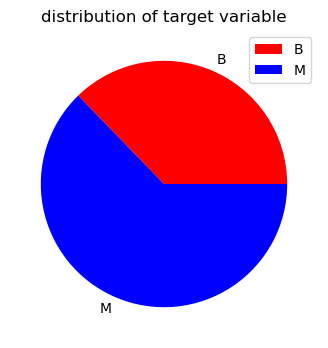

In [27]:
#distribution of the target variable
plt.figure(figsize=(6,4))
plt.title("distribution of target variable")
plt.pie([data['diagnosis'].value_counts()[0],data['diagnosis'].value_counts()[1]],colors=['r','b'],labels=['B','M'])
plt.legend()
plt.show()

CORRELATION BETWEEN THE TARGET AND OTHER VARIABLES

In [28]:
#correlation between variables
data.corr()['diagnosis'].sort_values

<bound method Series.sort_values of diagnosis                  1.000000
radius_mean               -0.730029
texture_mean              -0.415185
perimeter_mean            -0.742636
area_mean                 -0.708984
smoothness_mean           -0.358560
compactness_mean          -0.596534
concavity_mean            -0.696360
concave points_mean       -0.776614
symmetry_mean             -0.330499
fractal_dimension_mean     0.012838
radius_se                 -0.567134
texture_se                 0.008303
perimeter_se              -0.556141
area_se                   -0.548236
smoothness_se              0.067016
compactness_se            -0.292999
concavity_se              -0.253730
concave points_se         -0.408042
symmetry_se                0.006522
fractal_dimension_se      -0.077972
radius_worst              -0.776454
texture_worst             -0.456903
perimeter_worst           -0.782914
area_worst                -0.733825
smoothness_worst          -0.421465
compactness_worst         -0

SPLITTING THE DATA INTO TRAING AND TESTING DATA

In [29]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=df['diagnosis'])

In [ ]:
# Splitting dataset into train, validation, and test sets
train_ratio = 0.7
test_ratio = 0.3

# Read the datasets from the CSV files
X_train = pd.read_csv('Split Data/X_train.csv')
Y_train = pd.read_csv('Split Data/Y_train.csv').iloc[:, 0]

X_test = pd.read_csv('Split Data/X_test.csv')
Y_test = pd.read_csv('Split Data/Y_test.csv').iloc[:, 0]

#scaling the values

In [30]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

listing all the model

In [17]:
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
]

In [18]:
best_model=""
best_accuracy=0

DECIDING THE RIGHT MODEL

In [31]:
for name,model in models:
    model.fit(x_train_scaled,y_train)
    y_test_predicted=model.predict(x_test_scaled)
    accuracy=accuracy_score(y_test,y_test_predicted)
    report=classification_report(y_test,y_test_predicted)
    if accuracy > best_accuracy:
        best_model= name
        best_accuracy = accuracy

PRINTING RESULTS

Naive Bayes
0.965034965034965
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



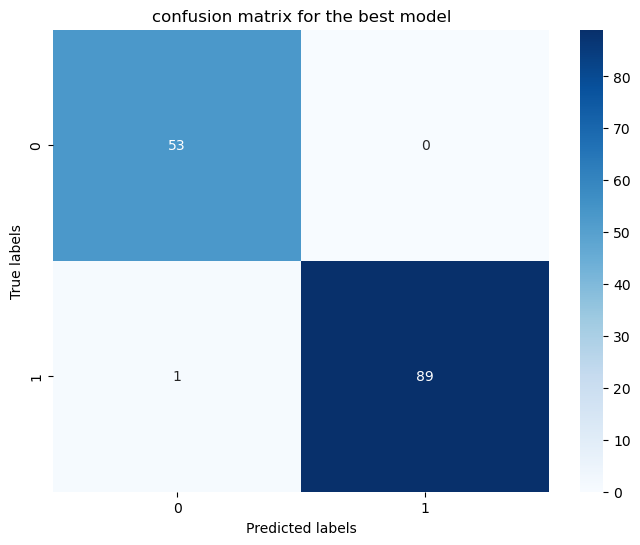

In [33]:
#printing results
print(best_model)
print(best_accuracy)
classifier=SVC()
classifier.fit(x_train_scaled,y_train)
y_predicted=classifier.predict(x_test_scaled)
print(classification_report(y_test,y_predicted))
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(8, 6))
sbn.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title("confusion matrix for the best model")
plt.show()
